In [62]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import verde as vd
import harmonica as hm
import boule as bl
import ensaio
import pygmt
import pyproj


import warnings
warnings.filterwarnings("ignore")

## Carrega os dados grav

In [63]:
path_gravity = ensaio.fetch_southern_africa_gravity(version=1)
path_topography = ensaio.fetch_earth_topography(version=1)
path_geoid  = ensaio.fetch_earth_geoid(version=1)

In [64]:
# data = pd.read_csv(path_gravity)
data = pd.read_csv('gravity_table.csv', delimiter=';')
data

,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,TideCorr,Source
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,0.053423,03122019_996
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,0.066119,03122019_996
2,3,2246.38,16:06:00,2019/12/03,117.30,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,0.077715,03122019_996
3,4,2245.71,16:46:00,2019/12/03,129.10,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,0.081974,03122019_996
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,0.082319,03122019_996
...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,2203015.00,17:06:00,2019/12/16,264.94,245174.133206,7.717189e+06,-41.445344,-20.627243,978555.178643,0.096166,16122019_996
223,224,2168435.00,09:38:00,2019/12/17,204.11,239604.189758,7.711266e+06,-41.499631,-20.679943,978573.732084,-0.030230,17122019_965
224,225,2164.15,11:52:00,2019/12/17,226.73,237502.245723,7.711667e+06,-41.519734,-20.676036,978569.446411,0.024382,17122019_965
225,226,2135695.00,15:49:00,2019/12/17,443.57,240697.890125,7.698939e+06,-41.490961,-20.791377,978540.768876,0.125092,17122019_965


In [65]:
# print(np.max(data.latitude))
# print(np.min(data.latitude))
# print(np.max(data.longitude))
# print(np.min(data.longitude))


In [66]:
topography = xr.load_dataarray(path_topography)
geoid = xr.load_dataarray(path_geoid)

In [67]:
# West, East, South, North (degrees)
# region = (-42, -41, -21, -20)
# region = (-41.5569883888889, -41.2805198611111, -20.8007570833333, -20.5533338333333)
region = (-41.5572222222, -41.2802777778, -20.8008333333, -20.5533333333)
# Pad the region for slicing the grids
region_pad = vd.pad_region(region, pad=0)

In [68]:
topography = pygmt.datasets.load_earth_relief(resolution="01s", region=region)
topography = topography.rename({'lon': 'longitude', 'lat': 'latitude'})
topography

<xarray.DataArray 'elevation' (latitude: 916, longitude: 1006)>
array([[430., 422., 411., ..., 105.,  99.,  96.],
       [438., 429., 424., ...,  99.,  96.,  92.],
       [447., 441., 434., ...,  92.,  91.,  91.],
       ...,
       [783., 787., 790., ..., 564., 577., 590.],
       [769., 772., 774., ..., 560., 577., 590.],
       [756., 758., 761., ..., 556., 575., 588.]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -41.56 -41.56 -41.56 ... -41.28 -41.28 -41.28
  * latitude   (latitude) float64 -20.8 -20.8 -20.8 ... -20.55 -20.55 -20.55
Attributes:
    long_name:         Earth elevation relative to the geoid
    cpt:               geo
    units:             meters
    vertical_datum:    EGM96
    horizontal_datum:  WGS84

In [69]:
# data = data[vd.inside((data.Longitude, data.Latitude), region)]
# data

In [97]:
# geoid = geoid.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
geoid = -5.6 # constante

In [98]:
topography = topography.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
# topography = topography.sel(lon=slice(*region_pad[:2]), lat=slice(*region_pad[2:]))
topography

<xarray.DataArray 'elevation' (latitude: 891, longitude: 996)>
array([[369., 365., 360., ..., 106., 103.,  99.],
       [357., 352., 348., ..., 103., 101.,  98.],
       [346., 342., 338., ..., 101.,  97.,  95.],
       ...,
       [653., 647., 645., ..., 541., 560., 575.],
       [660., 654., 653., ..., 540., 555., 570.],
       [665., 665., 663., ..., 535., 550., 563.]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -41.56 -41.56 -41.56 ... -41.28 -41.28 -41.28
  * latitude   (latitude) float64 -20.8 -20.8 -20.8 ... -20.55 -20.55 -20.55
Attributes:
    long_name:         Earth elevation relative to the geoid
    cpt:               geo
    units:             meters
    vertical_datum:    EGM96
    horizontal_datum:  WGS84

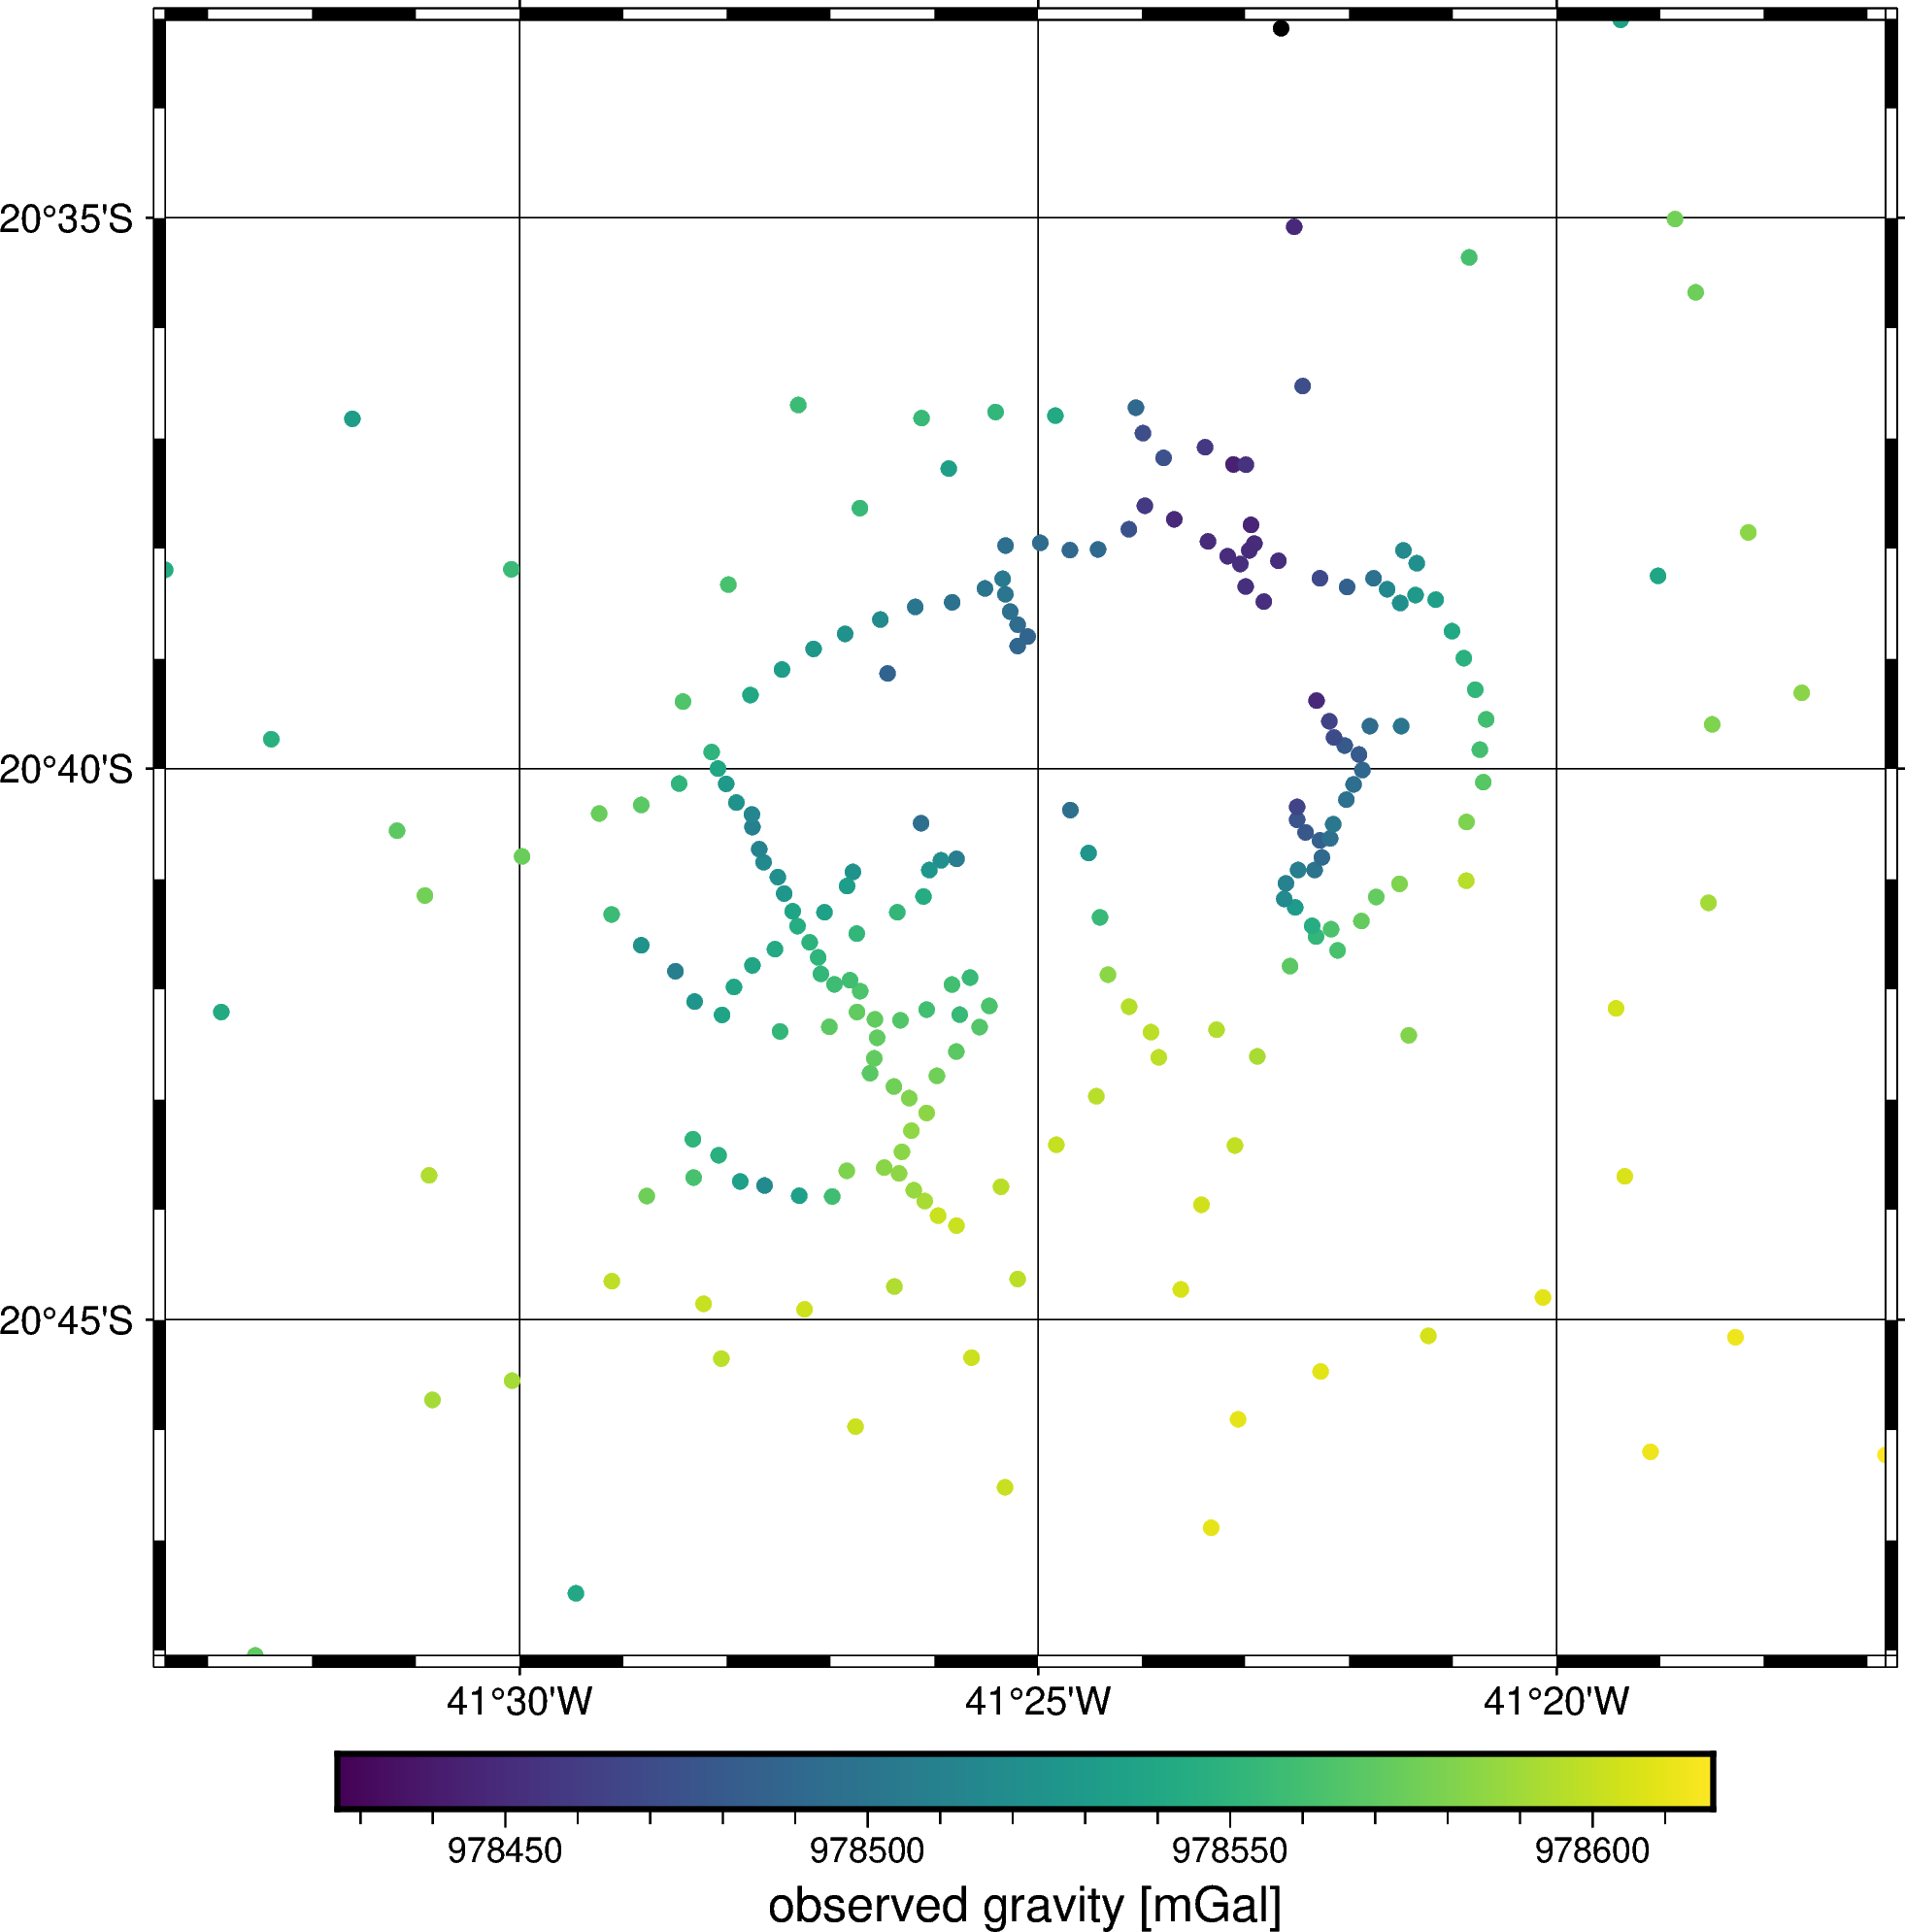

In [99]:
fig = pygmt.Figure()
pygmt.makecpt(cmap="viridis", series=[data.gravity_mgal.min(), data.gravity_mgal.max()])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame="afg",
)
fig.colorbar(frame='af+l"observed gravity [mGal]"')
fig.show(width=600)

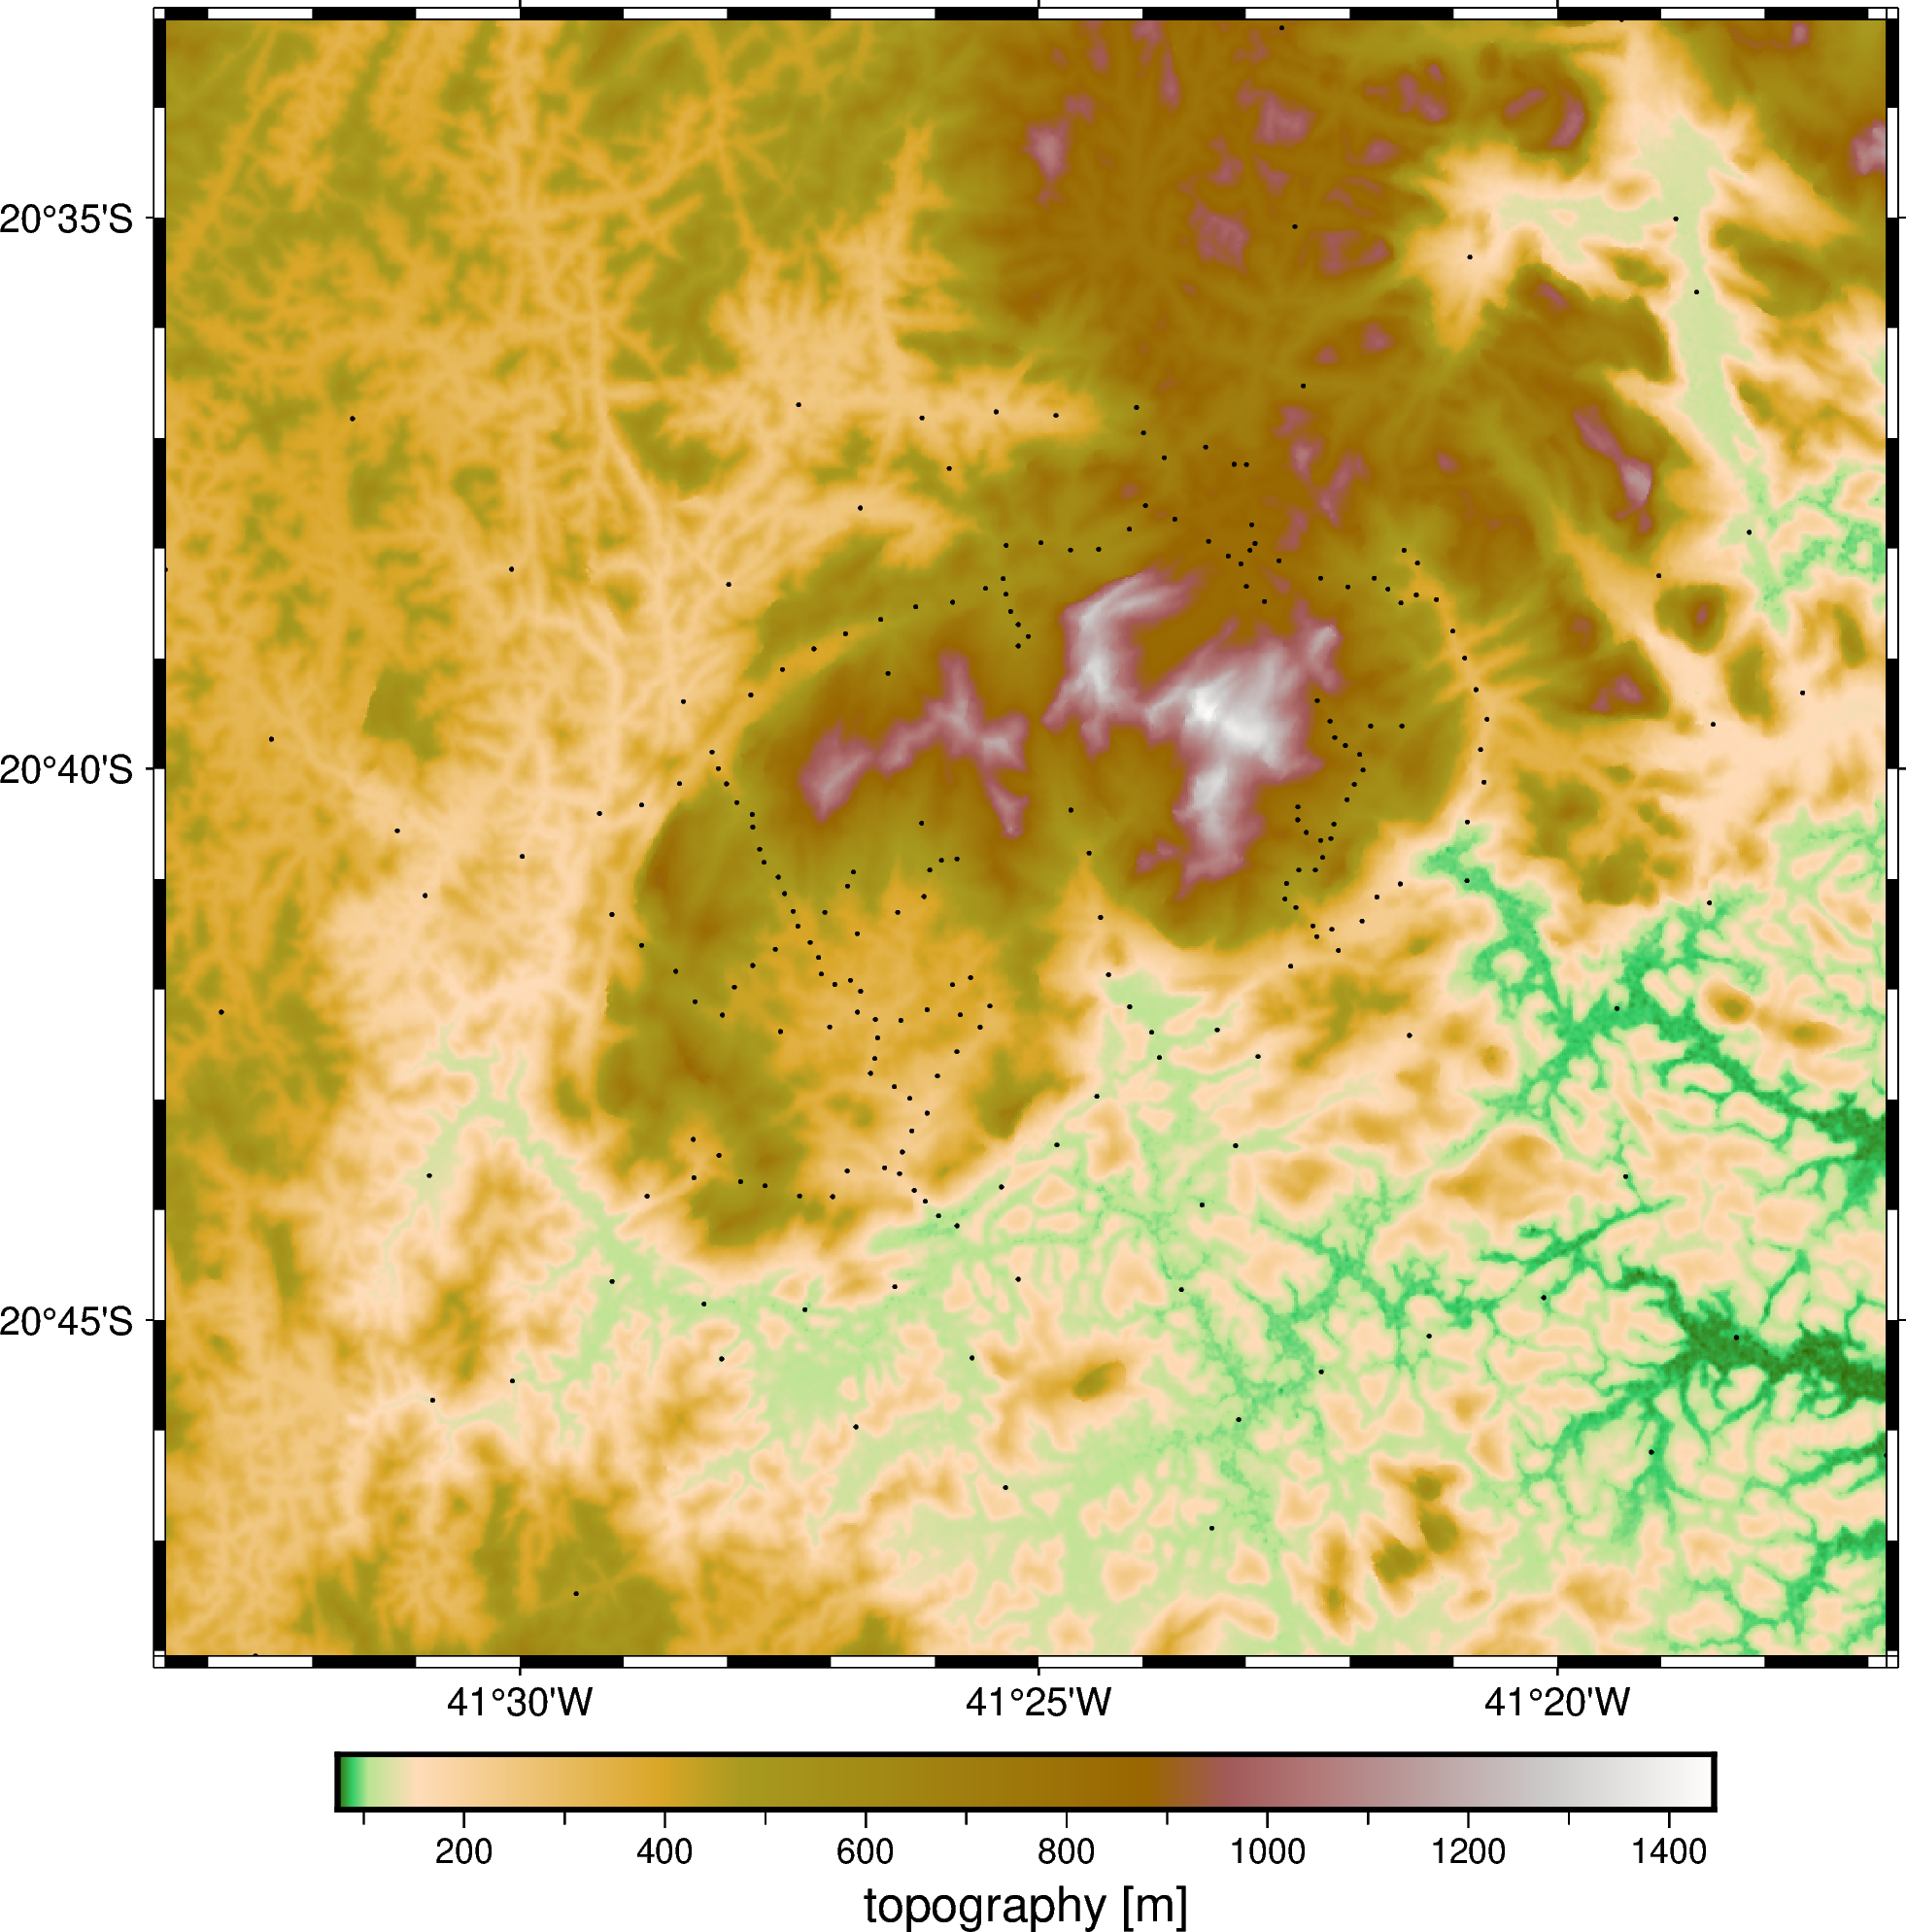

In [100]:
fig = pygmt.Figure()
fig.grdimage(topography, projection="M15c", cmap="etopo1", frame=True)
fig.colorbar(frame='af+l"topography [m]"')
fig.coast(shorelines="white", area_thresh=1e6)
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.04c",
    color="black",
)
fig.show(width=600)

## Converte altitudes ortométricas para geométricas

In [101]:
topography_geometric = topography + geoid
topography_geometric

<xarray.DataArray 'elevation' (latitude: 891, longitude: 996)>
array([[363.4, 359.4, 354.4, ..., 100.4,  97.4,  93.4],
       [351.4, 346.4, 342.4, ...,  97.4,  95.4,  92.4],
       [340.4, 336.4, 332.4, ...,  95.4,  91.4,  89.4],
       ...,
       [647.4, 641.4, 639.4, ..., 535.4, 554.4, 569.4],
       [654.4, 648.4, 647.4, ..., 534.4, 549.4, 564.4],
       [659.4, 659.4, 657.4, ..., 529.4, 544.4, 557.4]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -41.56 -41.56 -41.56 ... -41.28 -41.28 -41.28
  * latitude   (latitude) float64 -20.8 -20.8 -20.8 ... -20.55 -20.55 -20.55

In [105]:
# geoid_table = vd.grid_to_table(geoid)
# interpolator = vd.KNeighbors()
# interpolator.fit((geoid_table.longitude, geoid_table.latitude), geoid_table.geoid)
data = data.assign(geoid_m=interpolator.predict((data.longitude, data.latitude)))
data = data.assign(height_geometric_m=data.height_sea_level_m + data.geoid_m)
data

,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,TideCorr,Source,geoid_m,height_geometric_m,normal_gravity_mgal,gravity_disturbance_mgal,easting_m,northing_m
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,0.053423,03122019_996,-5.6,142.34,978637.755893,-46.349288,238246.104213,7.702141e+06
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,0.066119,03122019_996,-5.6,146.46,978636.310346,-44.864570,239573.565308,7.702483e+06
2,3,2246.38,16:06:00,2019/12/03,117.30,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,0.077715,03122019_996,-5.6,111.70,978646.141191,-47.667672,241216.748956,7.704176e+06
3,4,2245.71,16:46:00,2019/12/03,129.10,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,0.081974,03122019_996,-5.6,123.50,978643.198869,-45.388990,243071.287960,7.702906e+06
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,0.082319,03122019_996,-5.6,124.41,978643.532181,-41.786546,245332.547009,7.701803e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,2203015.00,17:06:00,2019/12/16,264.94,245174.133206,7.717189e+06,-41.445344,-20.627243,978555.178643,0.096166,16122019_996,-5.6,259.34,978593.592668,-38.414026,245174.133206,7.717189e+06
223,224,2168435.00,09:38:00,2019/12/17,204.11,239604.189758,7.711266e+06,-41.499631,-20.679943,978573.732084,-0.030230,17122019_965,-5.6,198.51,978615.508625,-41.776541,239604.189759,7.711266e+06
224,225,2164.15,11:52:00,2019/12/17,226.73,237502.245723,7.711667e+06,-41.519734,-20.676036,978569.446411,0.024382,17122019_965,-5.6,221.13,978608.293091,-38.846680,237502.245723,7.711667e+06
225,226,2135695.00,15:49:00,2019/12/17,443.57,240697.890125,7.698939e+06,-41.490961,-20.791377,978540.768876,0.125092,17122019_965,-5.6,437.97,978548.250028,-7.481152,240697.890126,7.698939e+06


## Distúrbio da gravidade

In [106]:
data = data.assign(
    normal_gravity_mgal=bl.WGS84.normal_gravity(data.latitude, data.height_geometric_m)
)
data = data.assign(gravity_disturbance_mgal=data.gravity_mgal - data.normal_gravity_mgal)
data

,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,TideCorr,Source,geoid_m,height_geometric_m,normal_gravity_mgal,gravity_disturbance_mgal,easting_m,northing_m
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,0.053423,03122019_996,-5.6,142.34,978637.755893,-46.349288,238246.104213,7.702141e+06
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,0.066119,03122019_996,-5.6,146.46,978636.310346,-44.864570,239573.565308,7.702483e+06
2,3,2246.38,16:06:00,2019/12/03,117.30,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,0.077715,03122019_996,-5.6,111.70,978646.141191,-47.667672,241216.748956,7.704176e+06
3,4,2245.71,16:46:00,2019/12/03,129.10,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,0.081974,03122019_996,-5.6,123.50,978643.198869,-45.388990,243071.287960,7.702906e+06
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,0.082319,03122019_996,-5.6,124.41,978643.532181,-41.786546,245332.547009,7.701803e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,2203015.00,17:06:00,2019/12/16,264.94,245174.133206,7.717189e+06,-41.445344,-20.627243,978555.178643,0.096166,16122019_996,-5.6,259.34,978593.592668,-38.414026,245174.133206,7.717189e+06
223,224,2168435.00,09:38:00,2019/12/17,204.11,239604.189758,7.711266e+06,-41.499631,-20.679943,978573.732084,-0.030230,17122019_965,-5.6,198.51,978615.508625,-41.776541,239604.189759,7.711266e+06
224,225,2164.15,11:52:00,2019/12/17,226.73,237502.245723,7.711667e+06,-41.519734,-20.676036,978569.446411,0.024382,17122019_965,-5.6,221.13,978608.293091,-38.846680,237502.245723,7.711667e+06
225,226,2135695.00,15:49:00,2019/12/17,443.57,240697.890125,7.698939e+06,-41.490961,-20.791377,978540.768876,0.125092,17122019_965,-5.6,437.97,978548.250028,-7.481152,240697.890126,7.698939e+06


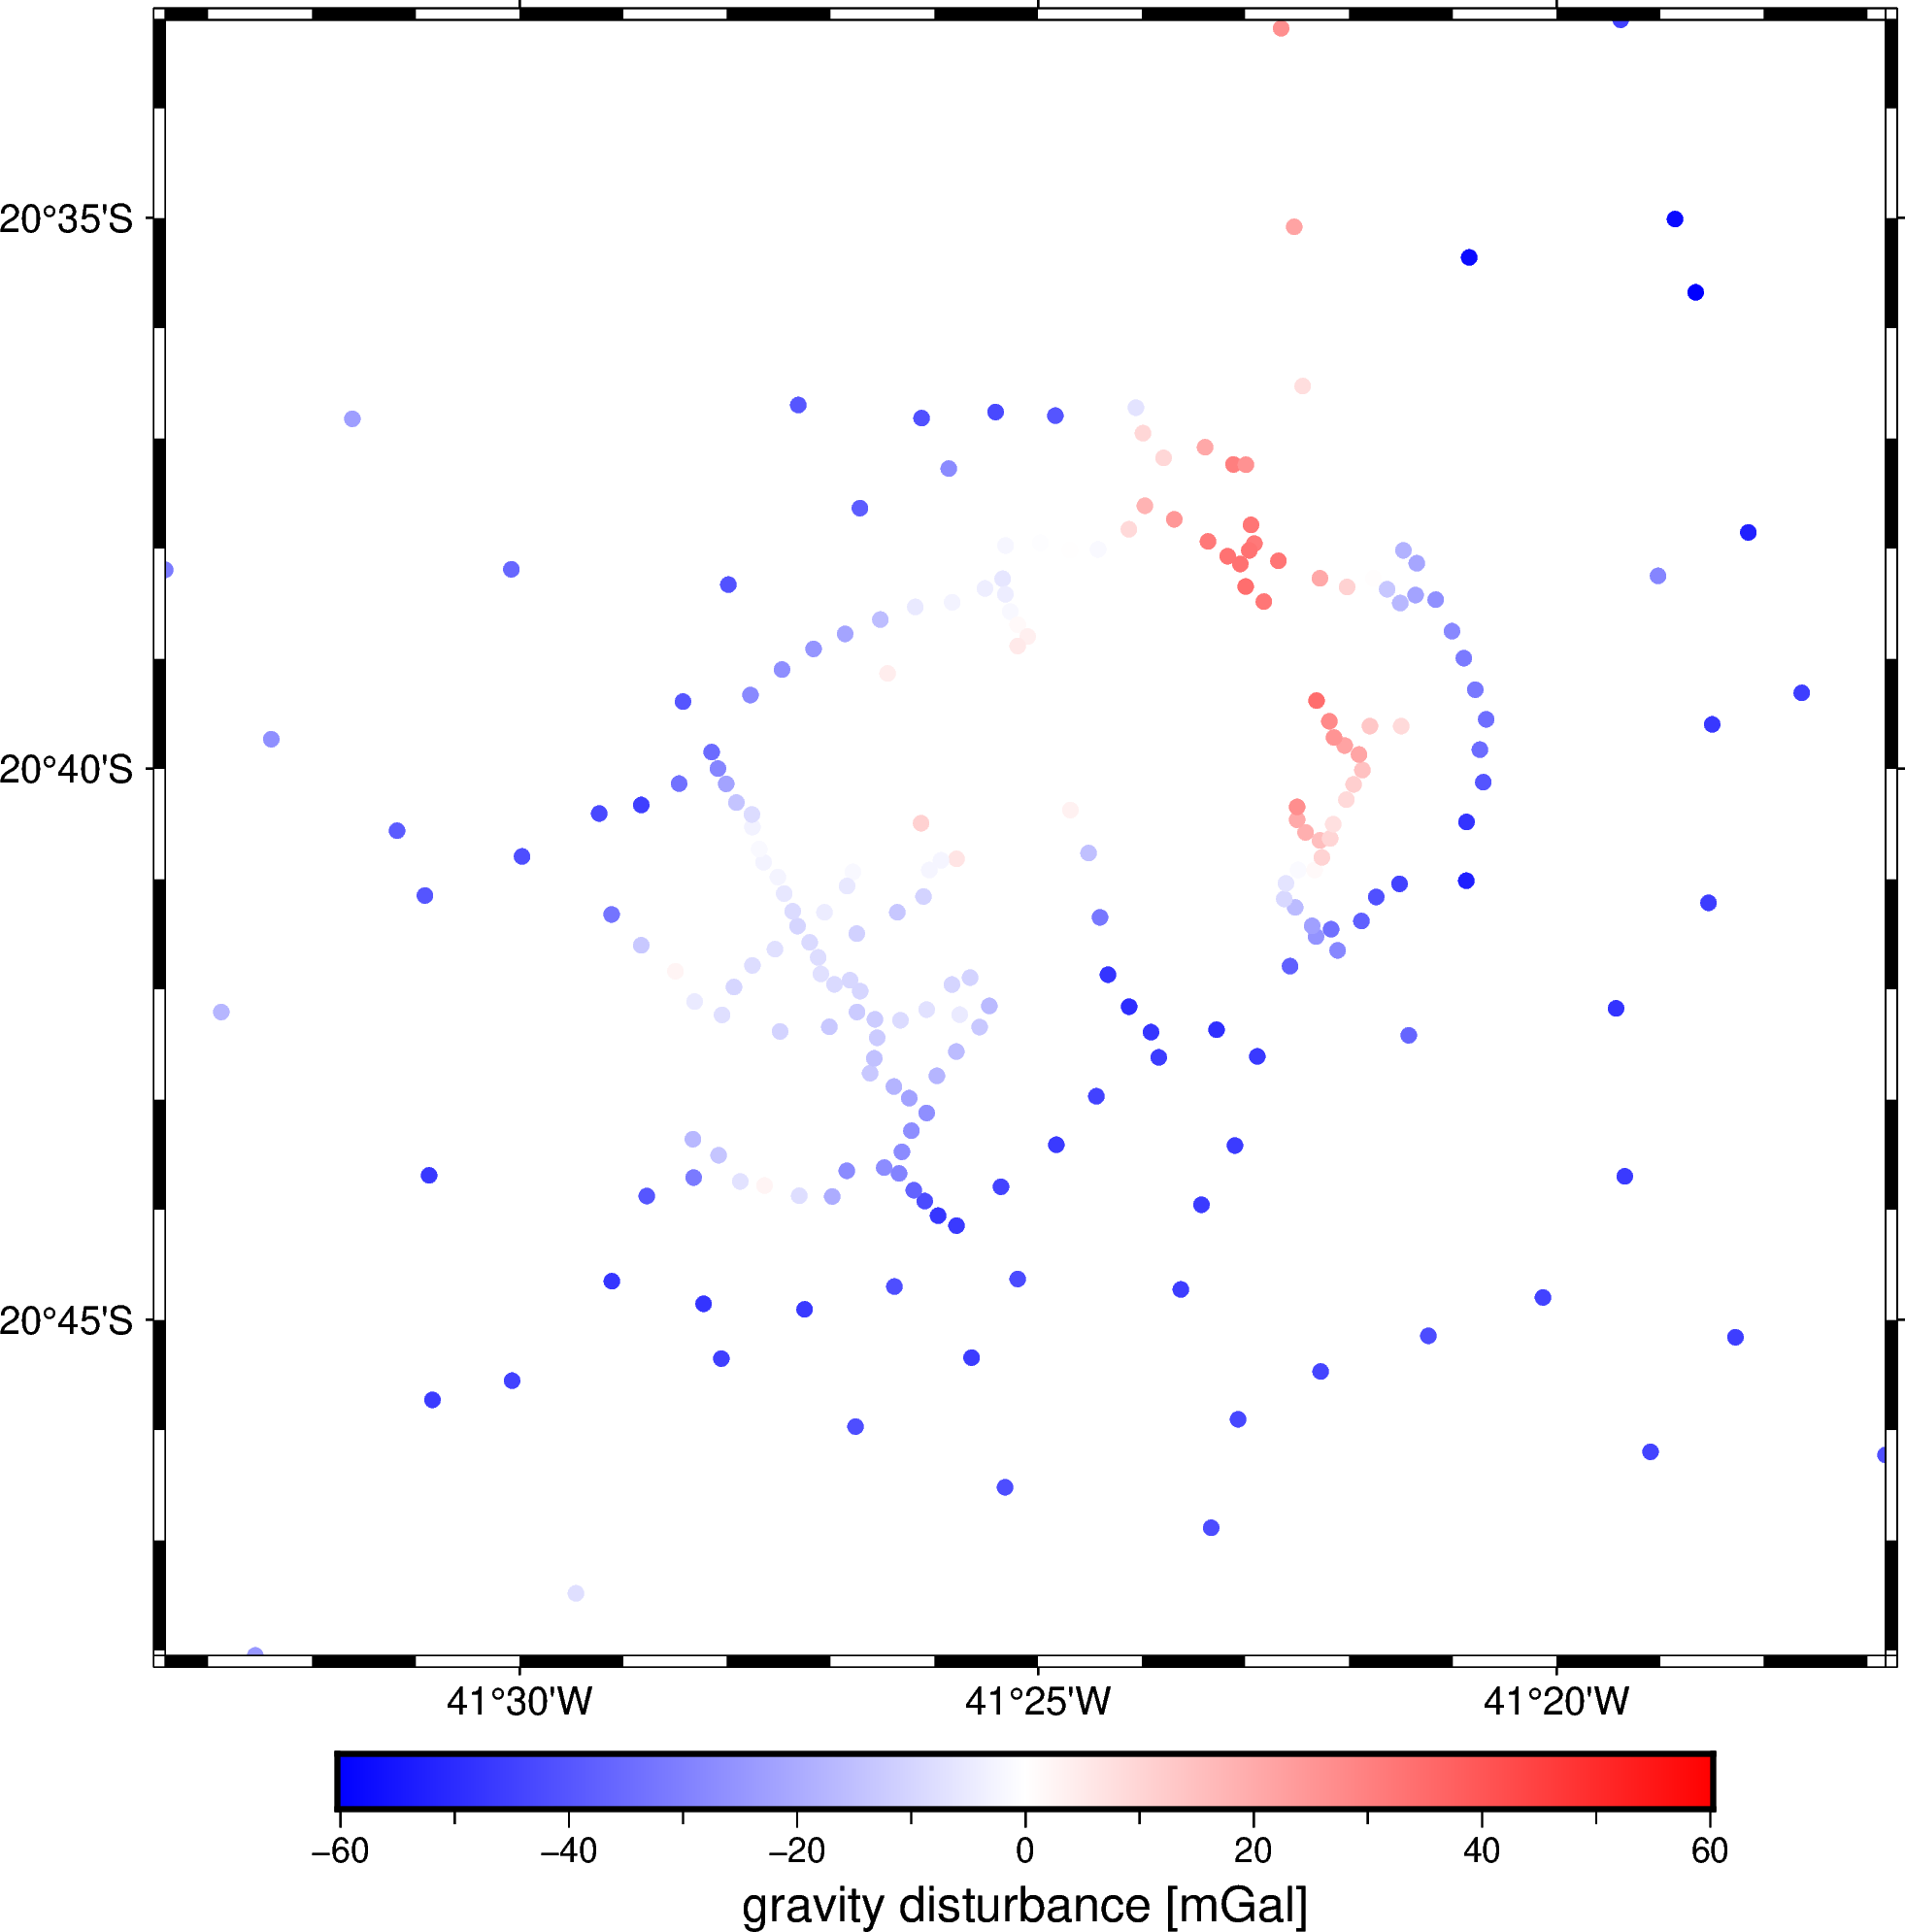

In [107]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_disturbance_mgal)
pygmt.makecpt(cmap="polar+h", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_disturbance_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame="af",
)
fig.colorbar(frame='af+l"gravity disturbance [mGal]"')
fig.show(width=600)

## Correção topográfica

![](https://www.fatiando.org/tutorials/_images/topographic-correction.svg)

In [108]:
# projection = pyproj.Proj(proj="merc", lat_ts=data.latitude.mean())
projection = pyproj.Proj(proj='utm', ellps='WGS84', zone=24, south=True)

In [109]:
easting, northing = projection(data.longitude.values, data.latitude.values)
data = data.assign(easting_m=easting, northing_m=northing)
data

,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,TideCorr,Source,geoid_m,height_geometric_m,normal_gravity_mgal,gravity_disturbance_mgal,easting_m,northing_m
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,0.053423,03122019_996,-5.6,142.34,978637.755893,-46.349288,238246.104213,7.702141e+06
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,0.066119,03122019_996,-5.6,146.46,978636.310346,-44.864570,239573.565308,7.702483e+06
2,3,2246.38,16:06:00,2019/12/03,117.30,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,0.077715,03122019_996,-5.6,111.70,978646.141191,-47.667672,241216.748956,7.704176e+06
3,4,2245.71,16:46:00,2019/12/03,129.10,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,0.081974,03122019_996,-5.6,123.50,978643.198869,-45.388990,243071.287960,7.702906e+06
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,0.082319,03122019_996,-5.6,124.41,978643.532181,-41.786546,245332.547009,7.701803e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,2203015.00,17:06:00,2019/12/16,264.94,245174.133206,7.717189e+06,-41.445344,-20.627243,978555.178643,0.096166,16122019_996,-5.6,259.34,978593.592668,-38.414026,245174.133206,7.717189e+06
223,224,2168435.00,09:38:00,2019/12/17,204.11,239604.189758,7.711266e+06,-41.499631,-20.679943,978573.732084,-0.030230,17122019_965,-5.6,198.51,978615.508625,-41.776541,239604.189759,7.711266e+06
224,225,2164.15,11:52:00,2019/12/17,226.73,237502.245723,7.711667e+06,-41.519734,-20.676036,978569.446411,0.024382,17122019_965,-5.6,221.13,978608.293091,-38.846680,237502.245723,7.711667e+06
225,226,2135695.00,15:49:00,2019/12/17,443.57,240697.890125,7.698939e+06,-41.490961,-20.791377,978540.768876,0.125092,17122019_965,-5.6,437.97,978548.250028,-7.481152,240697.890126,7.698939e+06


In [111]:
topography_proj = vd.project_grid(topography_geometric, projection, method="nearest")
topography_proj

<xarray.DataArray 'elevation' (northing: 891, easting: 996)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * easting   (easting) float64 2.334e+05 2.334e+05 ... 2.626e+05 2.626e+05
  * northing  (northing) float64 7.698e+06 7.698e+06 ... 7.726e+06 7.726e+06
Attributes:
    metadata:  Generated by Chain(steps=[('mean',\n              BlockReduce(...

In [82]:
topography_density = np.where(topography_proj > 0, 2670, 1040 - 2670)
topography_model = hm.prism_layer(
    coordinates=(topography_proj.easting, topography_proj.northing),
    surface=topography_proj,
    reference=0,
    properties={"density": topography_density}
)
topography_model

<xarray.Dataset>
Dimensions:   (northing: 891, easting: 996)
Coordinates:
  * easting   (easting) float64 2.334e+05 2.334e+05 ... 2.626e+05 2.626e+05
  * northing  (northing) float64 7.698e+06 7.698e+06 ... 7.726e+06 7.726e+06
    top       (northing, easting) float32 nan nan nan nan ... nan nan nan nan
    bottom    (northing, easting) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Data variables:
    density   (northing, easting) int64 -1630 -1630 -1630 ... -1630 -1630 -1630
Attributes:
    coords_units:      meters
    properties_units:  SI

grdimage [WARNING]: Your grid y's or latitudes appear to be outside the map region and will be skipped.
grdimage [WARNING]: No grid or image inside plot domain


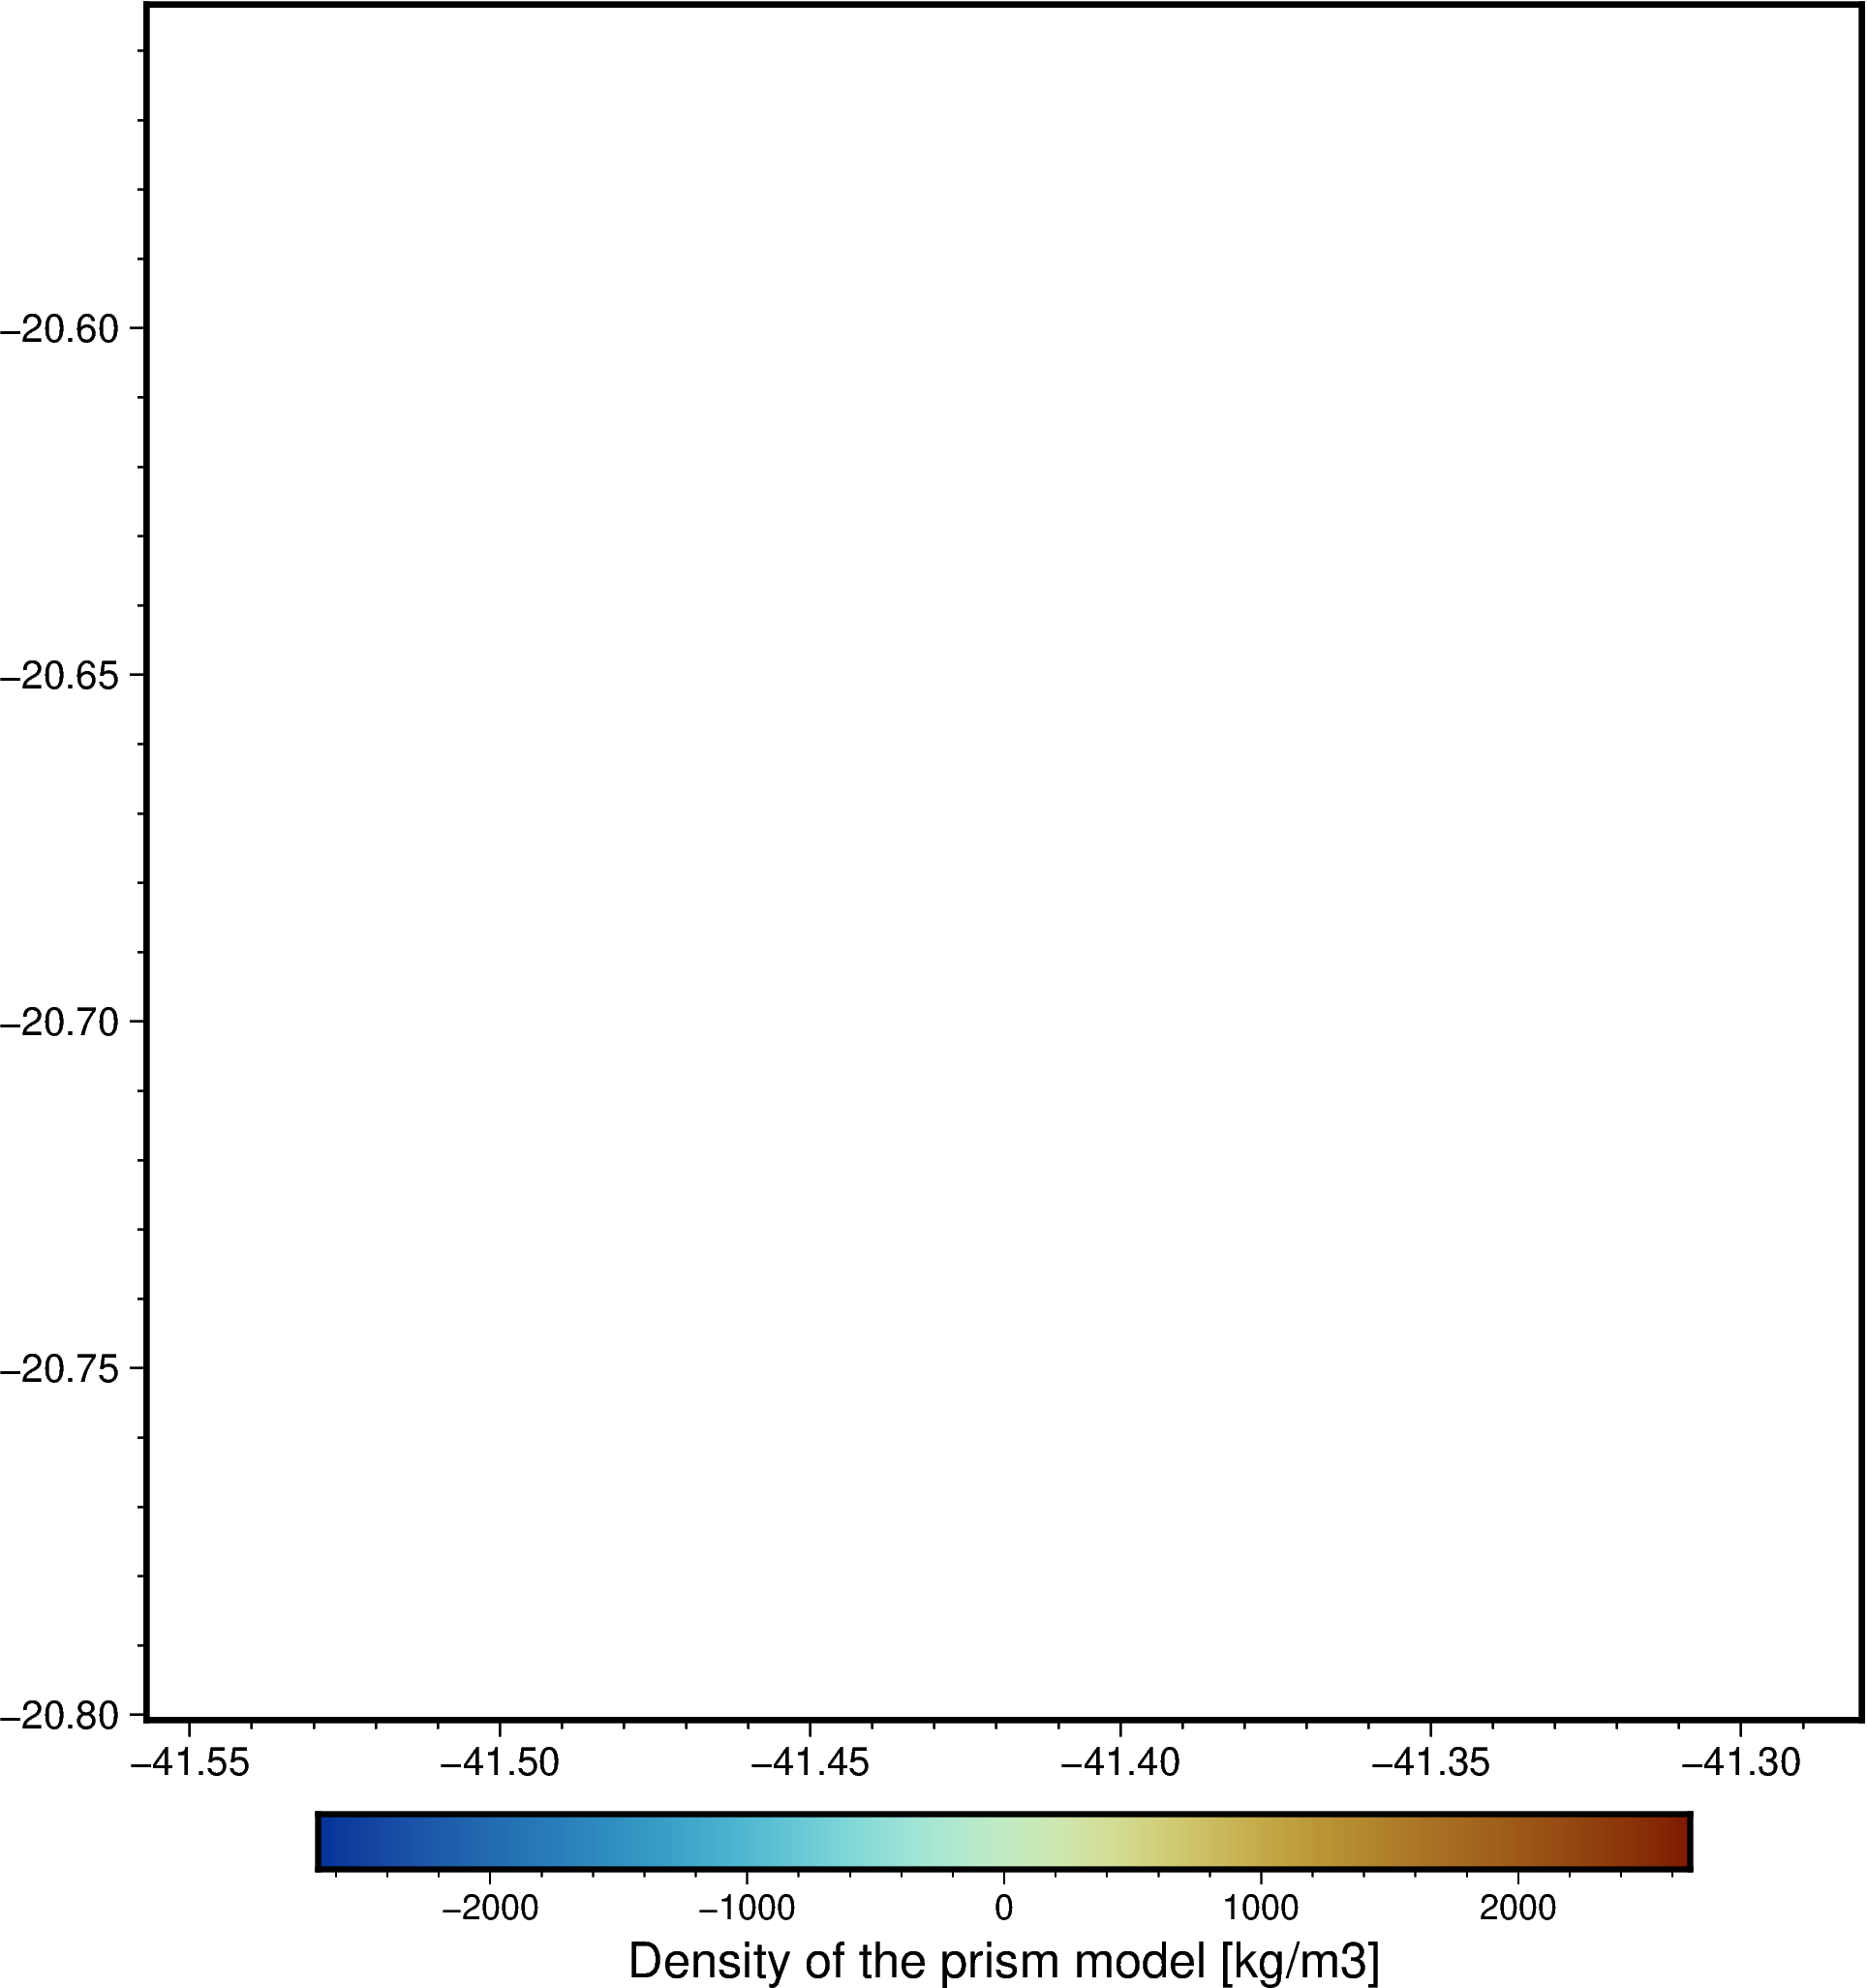

In [83]:
fig = pygmt.Figure()
scale = vd.maxabs(topography_model.density)
pygmt.makecpt(cmap="roma+h", reverse=True, series=[-scale, scale])
fig.grdimage(topography_model.density, projection="X15c", frame=True)
fig.colorbar(frame='af+l"Density of the prism model [kg/m3]"')
fig.show()

In [ ]:
coordinates = (data.easting_m, data.northing_m, data.height_geometric_m)
terrain_effect = topography_model.prism_layer.gravity(coordinates, field="g_z")

In [ ]:
data = data.assign(
    gravity_bouguer_mgal=data.gravity_disturbance_mgal - terrain_effect
)
data

In [ ]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_bouguer_mgal)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_bouguer_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Bouguer disturbance [mGal]"')
fig.show()

## Separação regional residual

In [ ]:
regional = vd.Trend(degree=3).fit(coordinates, data.gravity_bouguer_mgal)
data = data.assign(
    regional_mgal=regional.predict(coordinates),
)
data = data.assign(
    residual_mgal=data.gravity_bouguer_mgal - data.regional_mgal,
)
data

In [ ]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.regional_mgal)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.regional_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Regional [mGal]"')
fig.show()

In [ ]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.residual_mgal)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.residual_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Residual [mGal]"')
fig.show()

## Interpolação com fontes equivalentes

In [ ]:
eqs = hm.EquivalentSources(damping=10, depth=10e3)
eqs.fit((data.easting_m, data.northing_m, data.height_geometric_m), data.residual_mgal)

In [ ]:
residual_grid = eqs.grid(
    coordinates=vd.grid_coordinates(region, spacing=2 / 60, extra_coords=2.2e3),
    data_names="gravity_residual",
    dims=("latitude", "longitude"),
    projection=projection,
)
residual_grid

In [ ]:
fig = pygmt.Figure()
scale = vd.maxabs(residual_grid.gravity_residual)
pygmt.makecpt(cmap="polar", series=[-scale, scale], no_bg=True)
fig.grdimage(
    residual_grid.gravity_residual,
    shading="+a45+nt0.15",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"residual field [mGal]"')
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.02c",
    color="black",
)
fig.show()

![](https://www.fatiando.org/tutorials/_images/bushveld_igneous_complex_geology.jpg)